In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm

sns.set()

limit = 1000

In [83]:
dick = pd.read_pickle('country_data.pkl')

us_state_dict = pd.read_pickle('us_state_dict.pkl')
ny = us_state_dict['New York']
ny.index = pd.DatetimeIndex(ny.index)
dick['New York'] = ny

ny.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-10 to 2020-04-10
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   confirmed    32 non-null     float64
 1   deceased     32 non-null     float64
 2   recovered    32 non-null     float64
 3   inc          31 non-null     float64
 4   dead_inc     31 non-null     float64
 5   factor       31 non-null     float64
 6   dead_factor  27 non-null     float64
 7   density      32 non-null     float64
 8   population   32 non-null     int64  
 9   growth       32 non-null     float64
 10  gdp          32 non-null     int64  
 11  conf_per_M   32 non-null     float64
 12  dead_per_M   32 non-null     float64
dtypes: float64(11), int64(2)
memory usage: 3.5 KB


In [84]:
def process_country(country_name):
    df = dick[country_name]
    
    df = df[df['confirmed'] > limit]
    
    resample_period = ['W-MON','W-TUE','W-WED','W-THU','W-FRI','W-SAT','W-SUN']
    
    today = pd.datetime.today().weekday()

    yesterday = lambda i : resample_period[i % 7 -1] if i != 0 else resample_period[6]
    print (today)
    print (yesterday(today))
    
    #### MAKE SURE to adjust the param of resample so that all data points for the last week are included
    weekly = df[['inc','dead_inc']].resample(yesterday(today)).sum()
    ####
    
    weekly['factor'] = weekly['inc'] / weekly['inc'].shift()
    weekly['dead_factor'] = weekly['dead_inc'] / weekly['dead_inc'].shift()
    
    return weekly
    

In [85]:
def plot(weekly,country_name):
    
    plt.figure(figsize=(18,12))
    
    plt.plot(weekly.index,weekly['inc'],'x--',color='orange',
            label=r'new confirmed')
    plt.plot(weekly.index,weekly['dead_inc'],'x--',color='crimson',
            label = 'new dead')
    
    plt.plot(weekly.index,weekly['factor'],'o-',color='orange',
            label=r'weekly growth factor confirmed [ last weekly growth factor: {:.2f} ]'.format(weekly['factor'][-1]))
    
    plt.plot(weekly.index,weekly['dead_factor'],'o-',color='crimson',
             label=r'weekly growth factor dead [ last weekly growth factor: {:.2f} ]'.format(weekly['dead_factor'][-1]))
    
    plt.title('Corona - weekly sum of new CONFIRMED and DEAD for {} [confirmed > {}]'.format(str.upper(country_name),limit))
    
    plt.plot(weekly.index, [1] * len(weekly.index),color='lime',ls = 'dashed',label='factor 1.00')
    
    y_max = weekly['inc'].max() * 10
    y_min = 0.1
    
    plt.ylim([y_min,y_max])
    plt.yscale('log')
    plt.ylabel('weekly total')  
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')
    
    plt.savefig('corona_weekly_sums_{}.jpg'.format(country_name),format='jpg')


5
W-FRI
++++++++++++++++ INDIA ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-04-03  1580.0      48.0       NaN          NaN
2020-04-10  5031.0     174.0  3.184177        3.625


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ ITALY ++++++++++++++
                inc  dead_inc    factor  dead_factor
2020-03-06   3748.0     176.0       NaN          NaN
2020-03-13  13024.0    1069.0  3.474920     6.073864
2020-03-20  29361.0    2766.0  2.254377     2.587465
2020-03-27  39477.0    5102.0  1.344539     1.844541
2020-04-03  33329.0    5547.0  0.844264     1.087221
2020-04-10  27750.0    4168.0  0.832608     0.751397


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ SPAIN ++++++++++++++
                inc  dead_inc    factor  dead_factor
2020-03-13   4559.0     116.0       NaN          NaN
2020-03-20  15178.0     910.0  3.329239     7.844828
2020-03-27  45309.0    4095.0  2.985176     4.500000
2020-04-03  53480.0    6060.0  1.180339     1.479853
2020-04-10  39074.0    4883.0  0.730628     0.805776


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ SWEDEN ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-20   678.0      14.0       NaN          NaN
2020-03-27  1430.0      89.0  2.109145     6.357143
2020-04-03  3062.0     253.0  2.141259     2.842697
2020-04-10  3554.0     512.0  1.160679     2.023715


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ US ++++++++++++++
                 inc  dead_inc     factor  dead_factor
2020-03-13    1220.0      19.0        NaN          NaN
2020-03-20   17094.0     197.0  14.011475    10.368421
2020-03-27   82384.0    1337.0   4.819469     6.786802
2020-04-03  173929.0    5506.0   2.111199     4.118175
2020-04-10  220949.0   11499.0   1.270340     2.088449


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ KOREA, SOUTH ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-02-28  1360.0       3.0       NaN          NaN
2020-03-06  4256.0      29.0  3.129412     9.666667
2020-03-13  1386.0      24.0  0.325658     0.827586
2020-03-20   673.0      28.0  0.485570     1.166667
2020-03-27   680.0      45.0  1.010401     1.607143
2020-04-03   730.0      35.0  1.073529     0.777778
2020-04-10   388.0      34.0  0.531507     0.971429


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ NETHERLANDS ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-20  2041.0      95.0       NaN          NaN
2020-03-27  5644.0     440.0  2.765311     4.631579
2020-04-03  7174.0     943.0  1.271084     2.143182
2020-04-10  7428.0    1030.0  1.035406     1.092259


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ CANADA ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-27  3739.0      42.0       NaN          NaN
2020-04-03  7755.0     125.0  2.074084      2.97619
2020-04-10  9622.0     378.0  1.240748      3.02400


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ GERMANY ++++++++++++++
                inc  dead_inc    factor  dead_factor
2020-03-13   2876.0       7.0       NaN          NaN
2020-03-20  16173.0      60.0  5.623435     8.571429
2020-03-27  31023.0     275.0  1.918197     4.583333
2020-04-03  40288.0     933.0  1.298649     3.392727
2020-04-10  31012.0    1492.0  0.769758     1.599143


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ NEW YORK ++++++++++++++
                inc  dead_inc    factor  dead_factor
date                                                
2020-03-20   7343.0      32.0       NaN          NaN
2020-03-27  36566.0     485.0  4.979709    15.156250
2020-04-03  58111.0    2408.0  1.589209     4.964948
2020-04-10  69361.0    4932.0  1.193595     2.048173


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ FINLAND ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-27    83.0       2.0       NaN          NaN
2020-04-03   574.0      13.0  6.915663     6.500000
2020-04-10  1154.0      28.0  2.010453     2.153846


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ DENMARK ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-20   404.0       6.0       NaN          NaN
2020-03-27   863.0      43.0  2.136139     7.166667
2020-04-03  1746.0      87.0  2.023175     2.023256
2020-04-10  2068.0     108.0  1.184422     1.241379


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ NORWAY ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-20   918.0       7.0       NaN          NaN
2020-03-27  1841.0      12.0  2.005447     1.714286
2020-04-03  1615.0      40.0  0.877241     3.333333
2020-04-10   944.0      54.0  0.584520     1.350000


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ FRANCE ++++++++++++++
                inc  dead_inc    factor  dead_factor
2020-03-13   2722.0      68.0       NaN          NaN
2020-03-20   9077.0     372.0  3.334680     5.470588
2020-03-27  20644.0    1546.0  2.274320     4.155914
2020-04-03  31800.0    4523.0  1.540399     2.925614
2020-04-10  60729.0    6695.0  1.909717     1.480212


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ BELGIUM ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-20  1371.0      33.0       NaN          NaN
2020-03-27  5027.0     252.0  3.666667     7.636364
2020-04-03  9486.0     854.0  1.887010     3.388889
2020-04-10  9897.0    1876.0  1.043327     2.196721


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


5
W-FRI
++++++++++++++++ AUSTRALIA ++++++++++++++
               inc  dead_inc    factor  dead_factor
2020-03-27  2352.0       6.0       NaN          NaN
2020-04-03  2187.0      15.0  0.929847     2.500000
2020-04-10   885.0      26.0  0.404664     1.733333


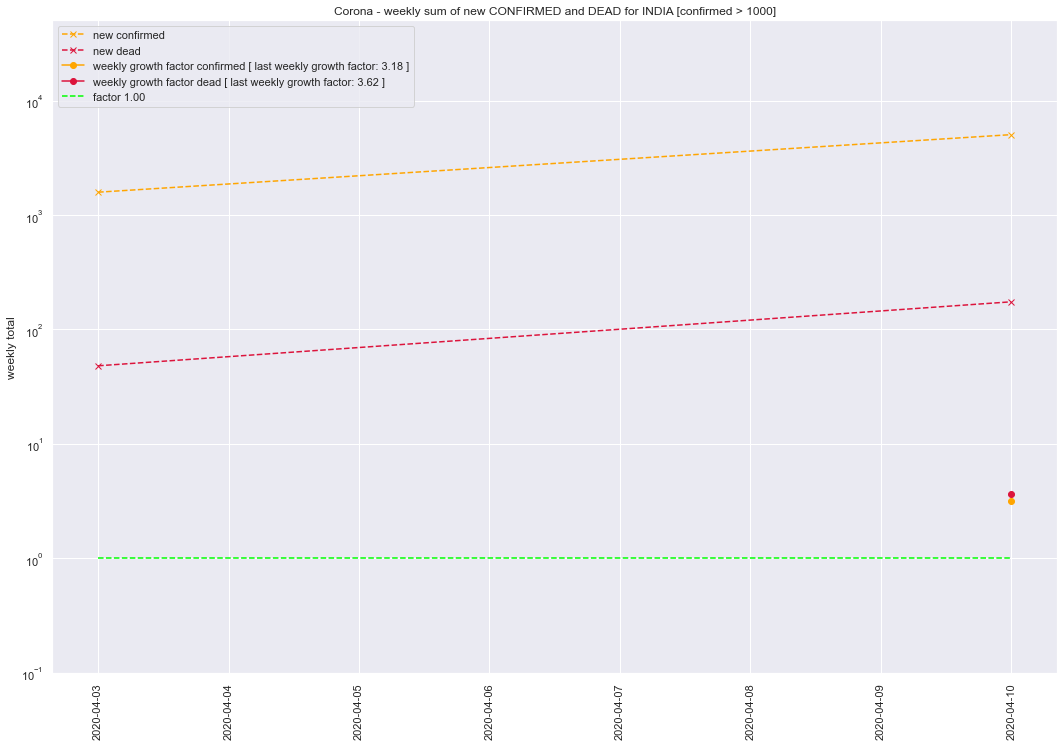

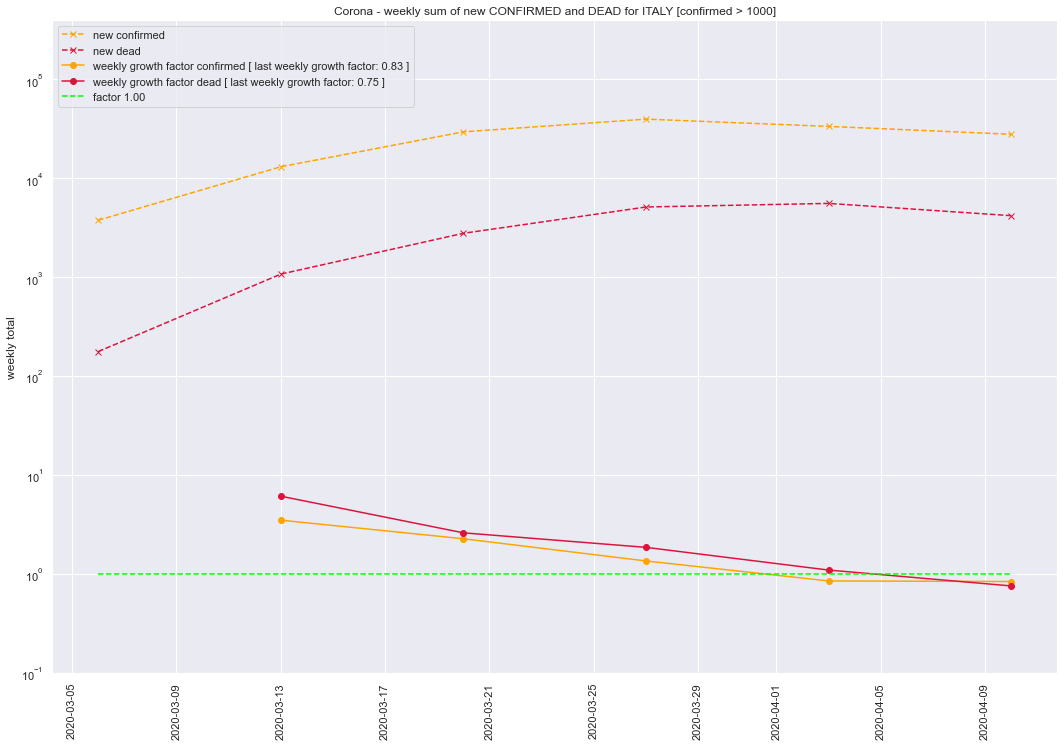

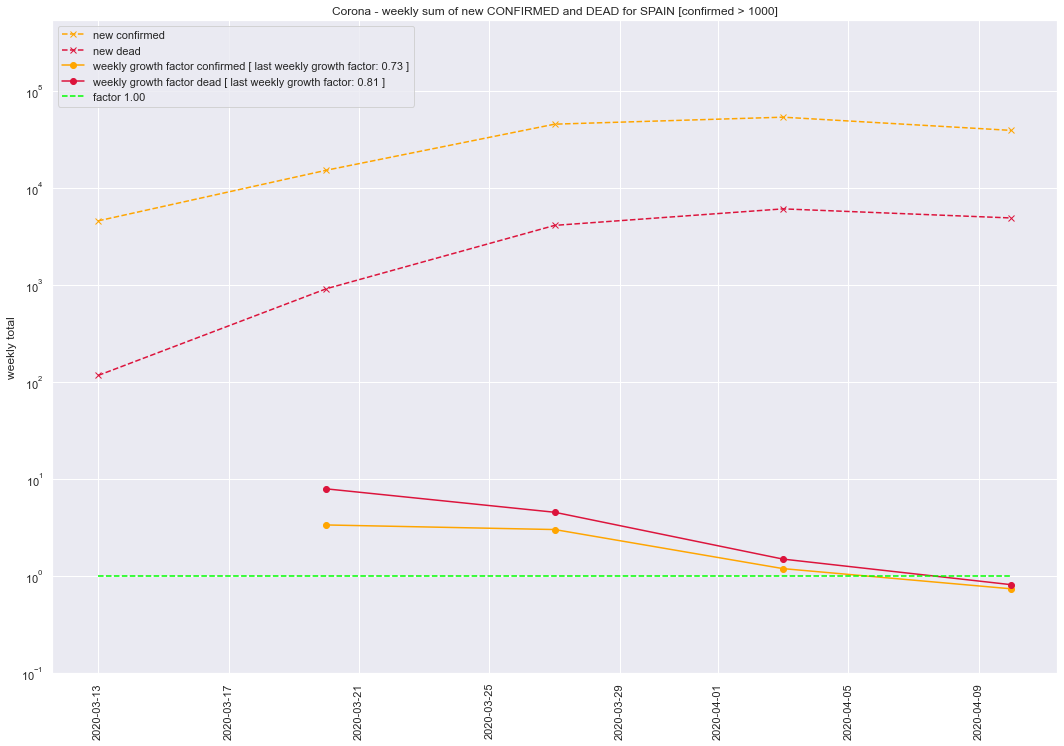

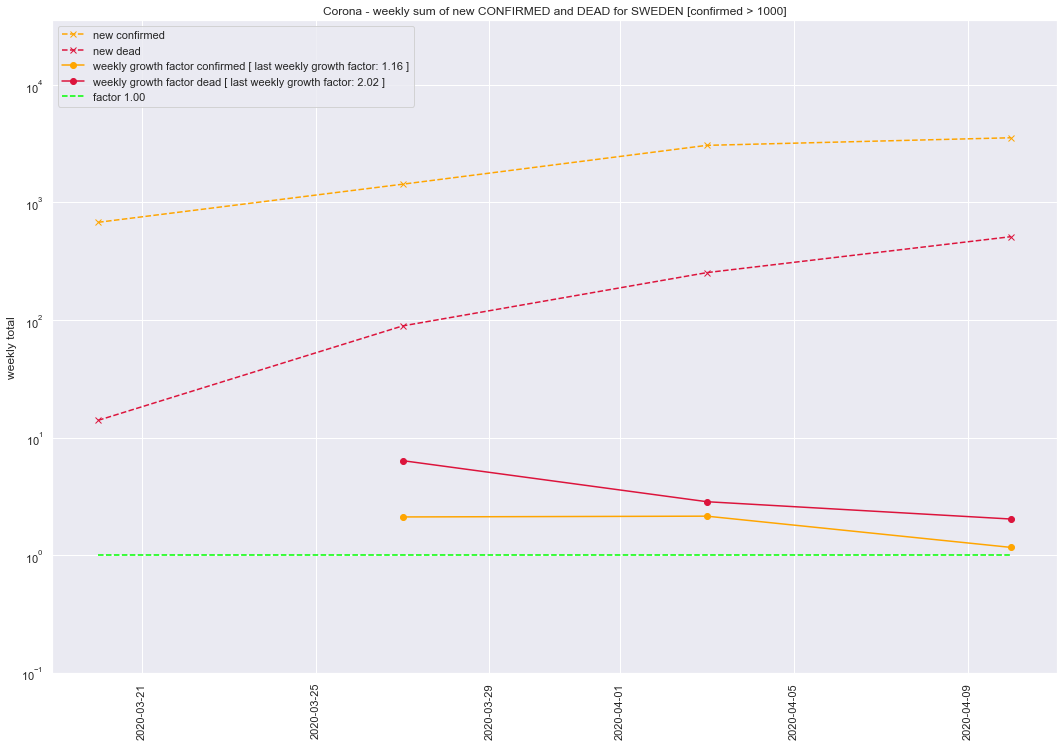

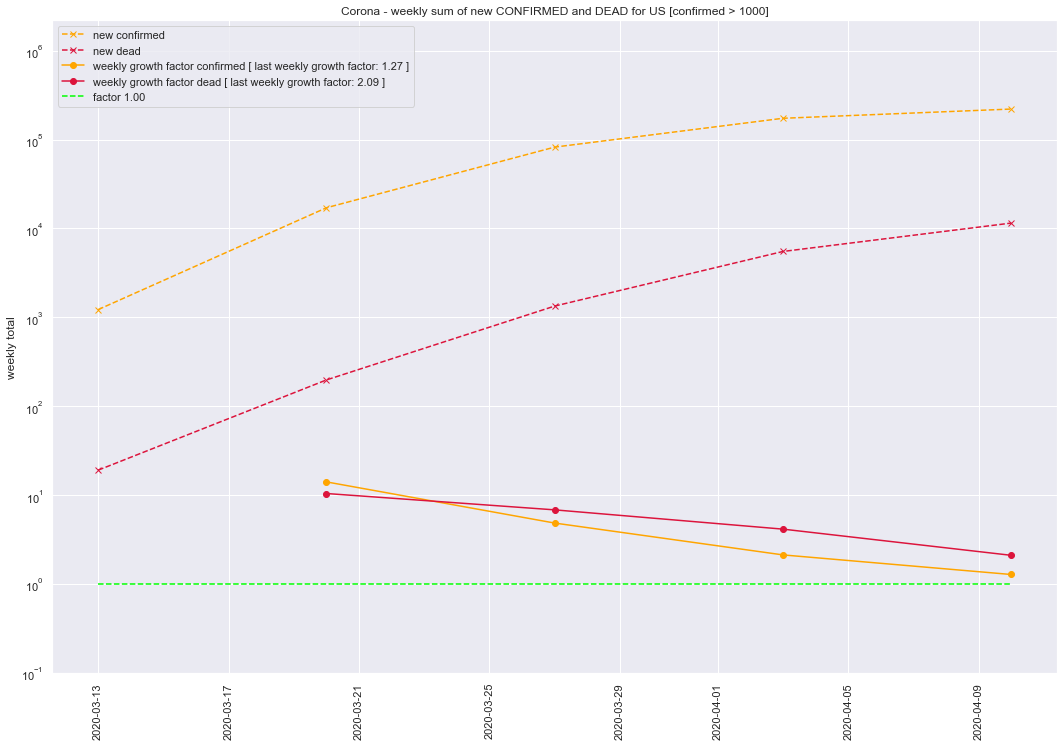

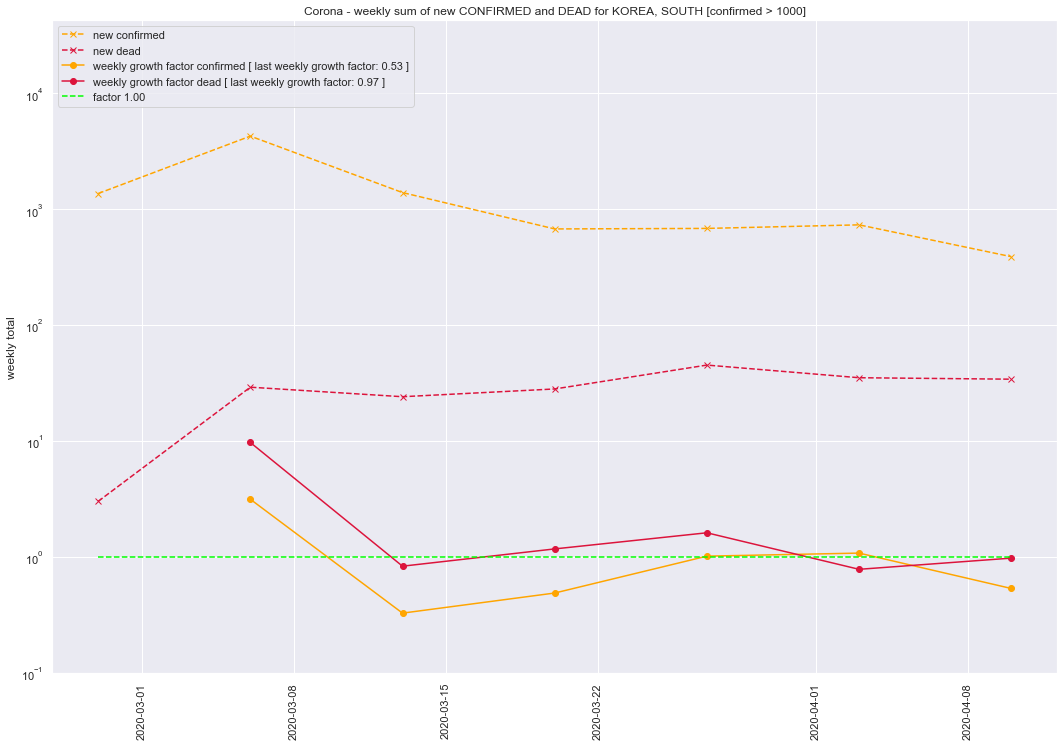

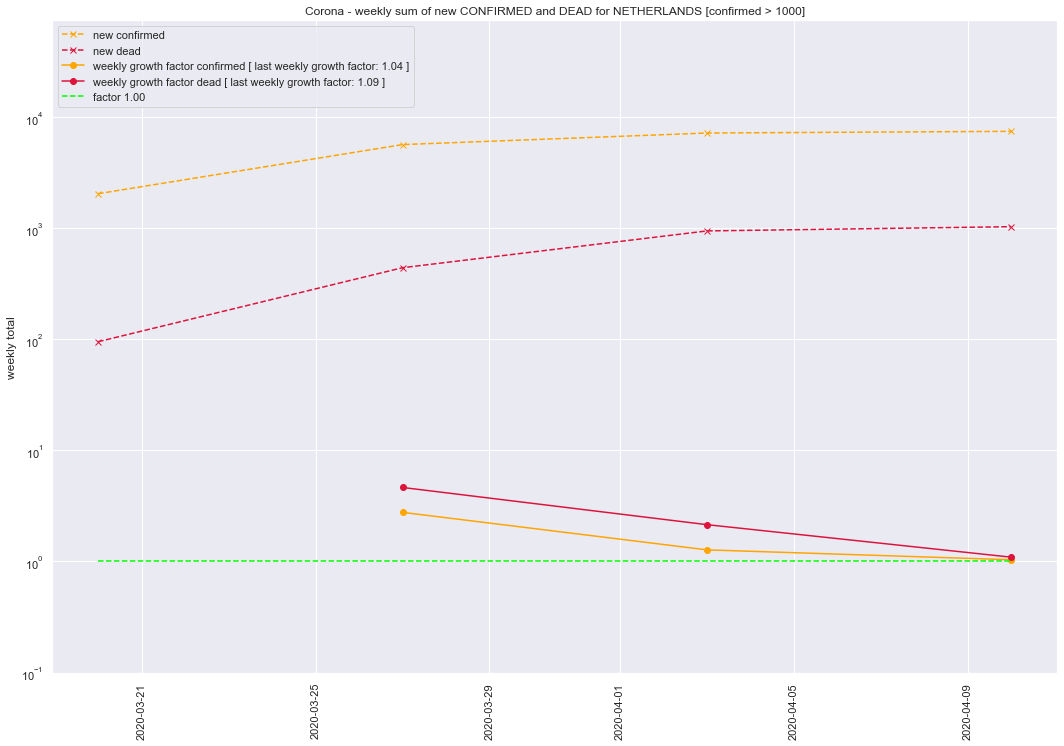

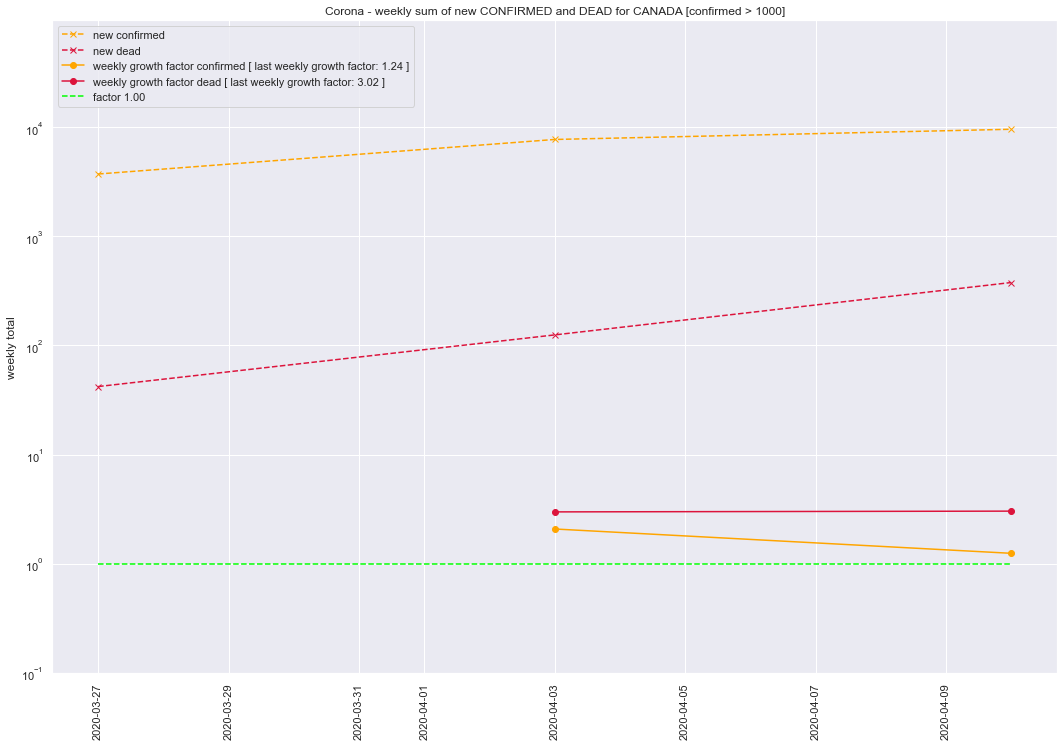

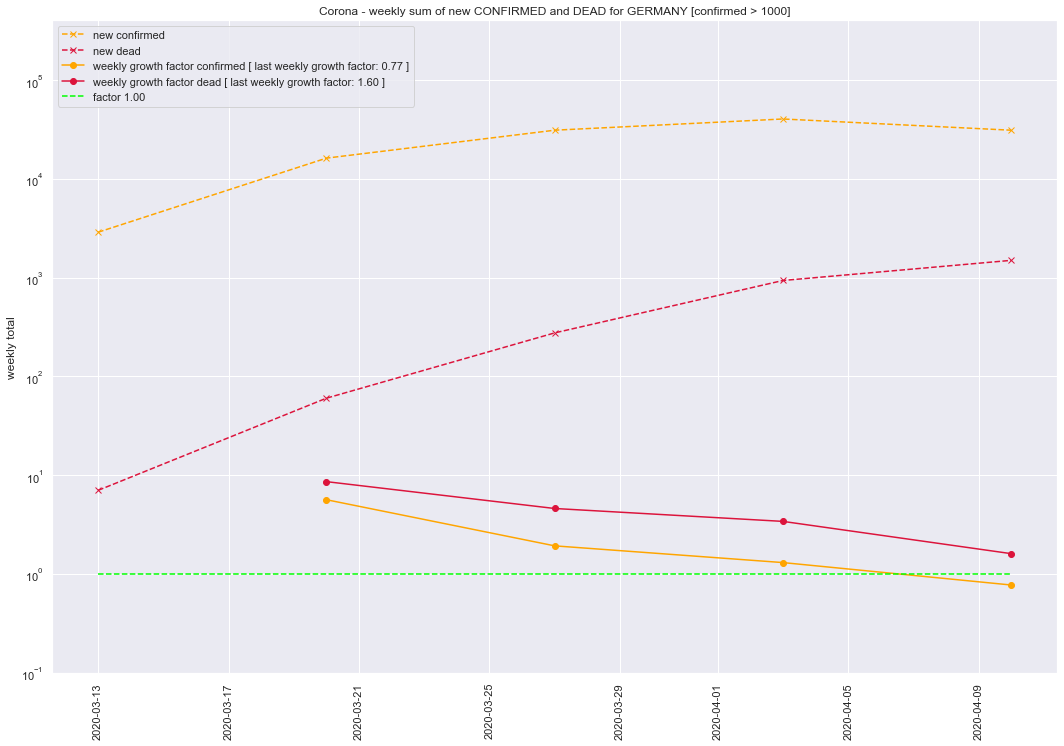

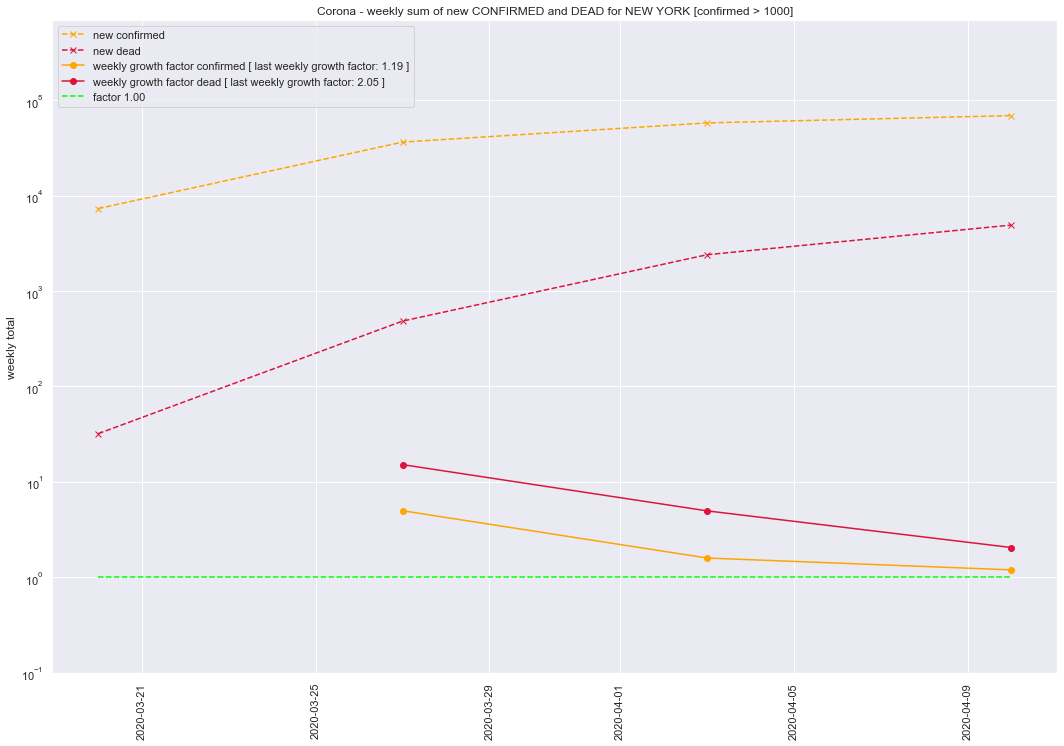

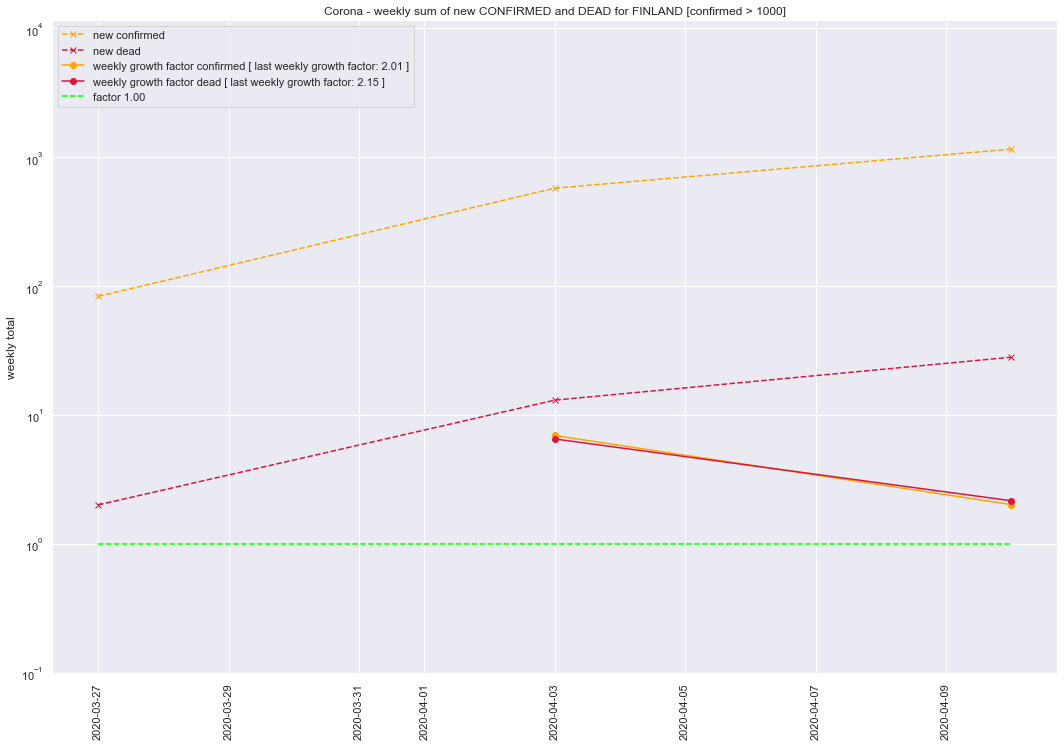

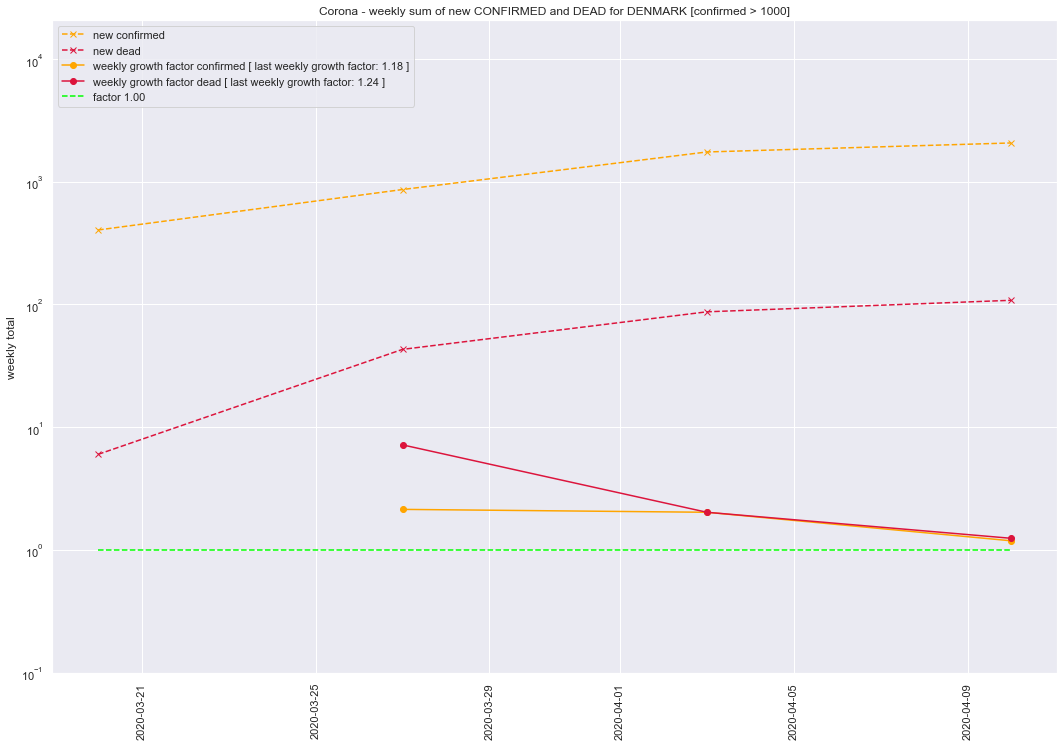

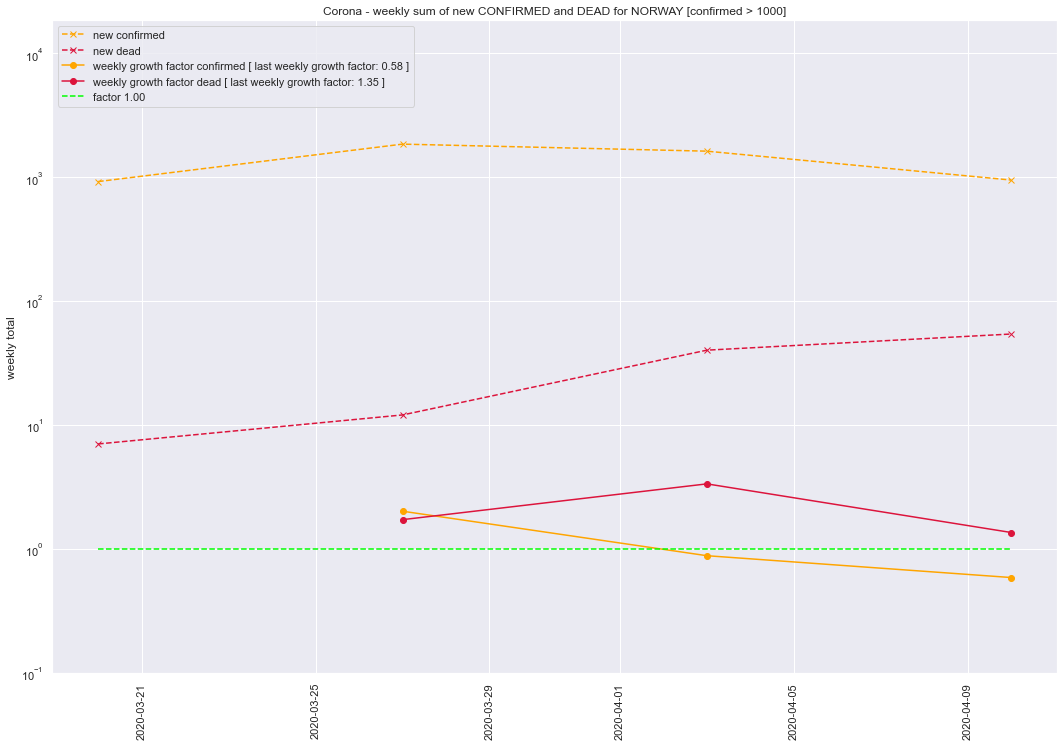

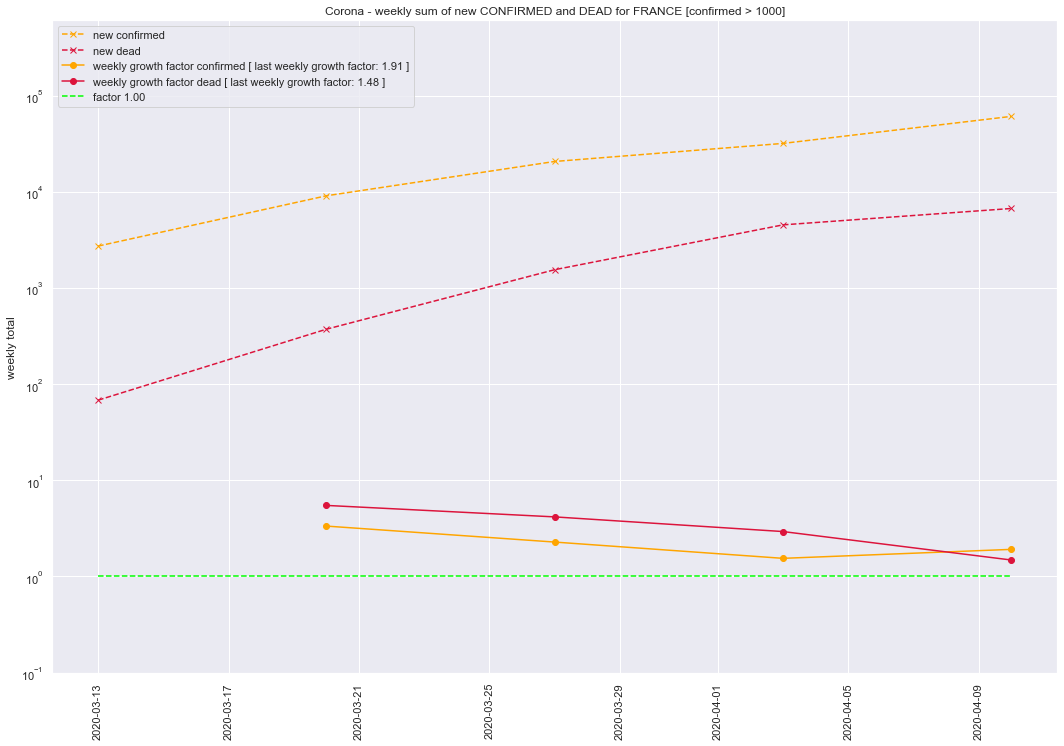

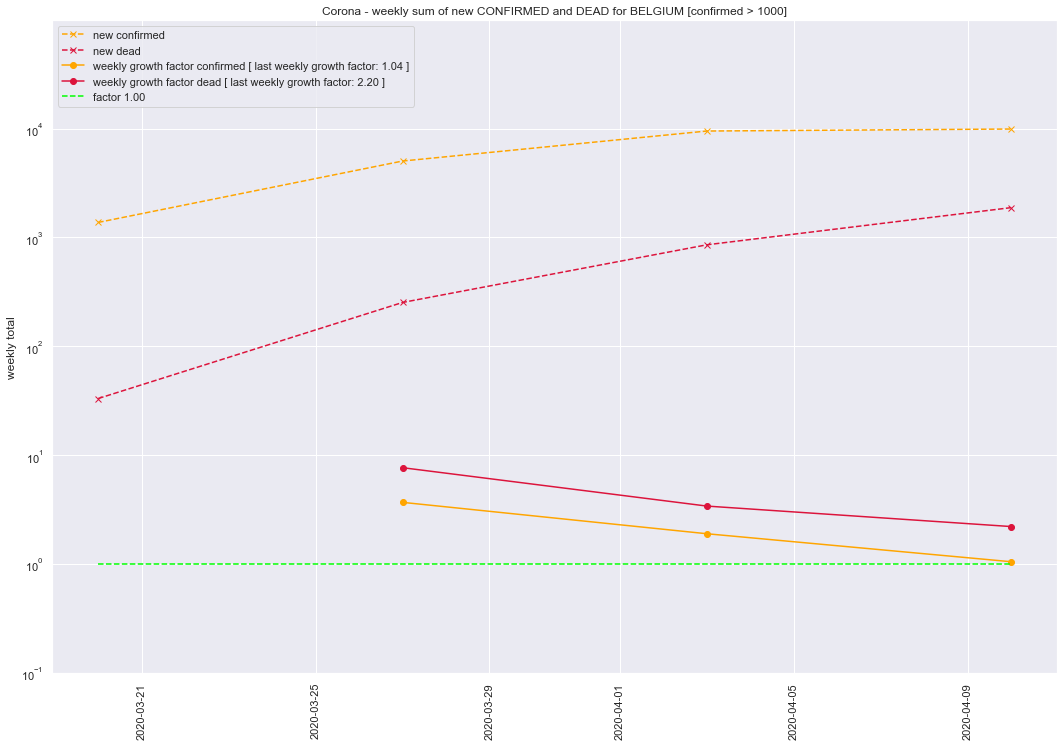

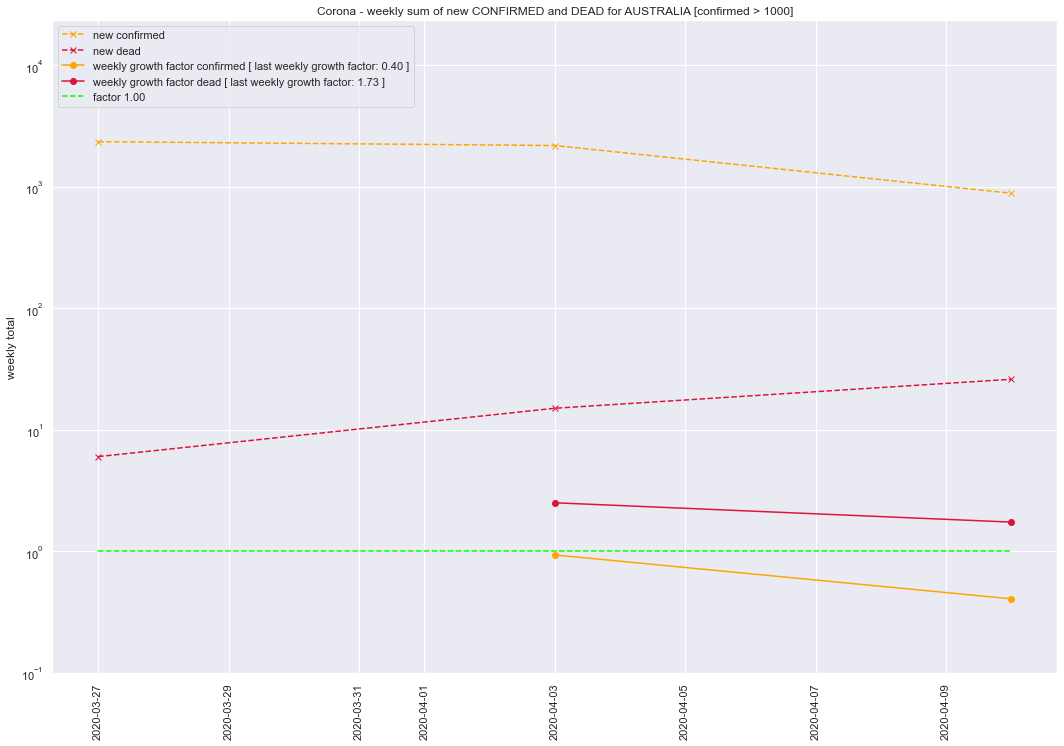

In [86]:
countries = ['India','Italy','Spain','Sweden','US',
             'Korea, South','Netherlands','Canada','Germany','New York','Finland',
            'Denmark','Norway','France','Belgium','Australia']

for c in countries:
    weekly = process_country(c)
    print ('++++++++++++++++ {} ++++++++++++++'.format(str.upper(c)))
    print (weekly.head(10))
    plot(weekly,c)